# Control analysis for computing difference in average sound intensity

Performed to show that there was no significant difference in average sound intensity between speech and non-speech fragments

In [2]:
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from wilcoxon import wilcoxon
from scipy.io import wavfile
import seaborn as sns
from utils import load_fragment_times, resample

%matplotlib inline

In [3]:
hdir = '..'
speech = load_fragment_times(hdir, 'speech')
nonspeech = load_fragment_times(hdir, 'nonspeech')
spectral_envelope = np.load('../data/audio_envelope_100Hz.npy')
sr, raw_intensity = wavfile.read('../data/M3_audio_mono_down.wav')
pitch  = np.loadtxt('../data//M3_audio_mono_down_pitch_short_edited')
raw_intensity_100 = resample(raw_intensity, 100, sr)

/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)
/home/julia/Documents/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


In [4]:
ar = raw_intensity_100.copy()
mean_speech = np.zeros(speech.shape[0])
mean_nonspeech = np.zeros_like(mean_speech)

for f, (st, en) in enumerate(speech):
    mean_speech[f] = np.mean(ar[st:en])

for f, (st, en) in enumerate(nonspeech):
    mean_nonspeech[f] = np.mean(ar[st:en])

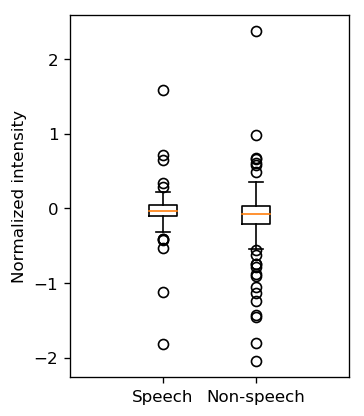

In [5]:
plt.figure(figsize=(3, 4), dpi=120)
plt.boxplot([mean_speech, mean_nonspeech], positions=np.arange(0,1,.5))
plt.xticks([0, .5], ['Speech', 'Non-speech'])
plt.ylabel('Normalized intensity')
plt.show()

In [6]:
print(ttest_ind(mean_speech, mean_nonspeech))
print(wilcoxon(mean_speech-mean_nonspeech))

Ttest_indResult(statistic=1.6369811419302902, pvalue=0.10301388883702055)
WilcoxonResult(w_statistic=2669.0, z_statistic=-1.8586428497317848, pvalue=0.06307777914064713)


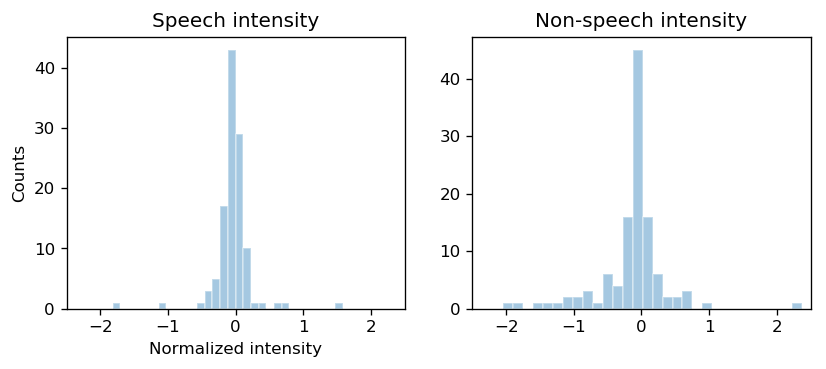

In [7]:
plt.figure(figsize=(8, 3), dpi=120)
plt.subplot(121)
sns.distplot(mean_speech, 30, kde=False, hist_kws = {'edgecolor':'w'})
plt.xlim(-2.5, 2.5)
plt.xlabel('Normalized intensity')
plt.ylabel('Counts')
plt.title('Speech intensity')

plt.subplot(122)
sns.distplot(mean_nonspeech, 30, kde=False, hist_kws = {'edgecolor':'w'})
plt.xlim(-2.5, 2.5)
plt.title('Non-speech intensity')
plt.show()